# SIAMESE NETS

In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../')

In [2]:
from src.data.class_balancing import class_sampler
from src.support_models.triplet_generator import TripletGenerator
from src.support_models.loss_functions import triplet_loss, identity_loss
from src.support_models.base_model import base_model
from src.support_models.siamese_model_architecture import siamese_model
from src.support_models.siamese_metric_learner import SiameseMetricLearner

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kaigorodov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kaigorodov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# with open('../data/processed/pure_data.pkl', 'rb') as data_file:
#     df = pickle.load(data_file)
    
with open('../../data/processed/pure_data_vectorized.pkl', 'rb') as data_file:
    df = pickle.load(data_file)
    
X_train, X_test, y_train, y_test = df

# oversample = RandomOverSampler(sampling_strategy='minority')
# for i in tqdm(range(100)):
#     X_train, y_train = oversample.fit_resample(X_train, y_train)

#X_train, y_train = class_sampler(X_train, y_train)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2153, 768), (539, 768), (2153,), (539,))

In [6]:
X_train

array([[-0.06138874,  0.07730257,  0.11866412, ...,  0.03602187,
         0.13808426,  0.20335081],
       [-0.2540485 , -0.12133408,  0.13551083, ...,  0.1144911 ,
         0.2503116 ,  0.20042512],
       [-0.0957427 , -0.30971292,  0.03582312, ...,  0.07276029,
         0.42173734,  0.09857774],
       ...,
       [-0.21105294, -0.18861827,  0.1727826 , ...,  0.11244375,
         0.31073022,  0.13943845],
       [-0.00807863,  0.01507305,  0.15714052, ..., -0.08479305,
         0.23645818,  0.20983927],
       [-0.13082795, -0.09622623,  0.13010076, ...,  0.01810479,
         0.36225775,  0.15798448]])

In [7]:
np.unique(y_train).shape, np.unique(y_test).shape

((432,), (208,))

(<AxesSubplot:ylabel='Count'>, <AxesSubplot:ylabel='Count'>)

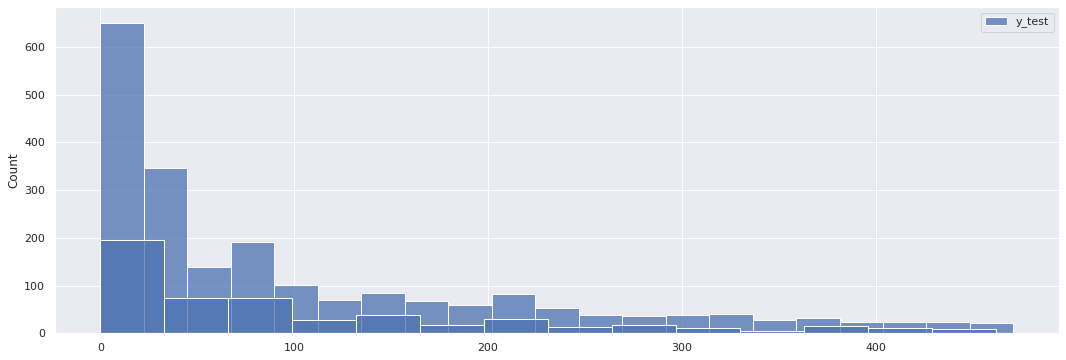

In [8]:
import pandas as pd
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.histplot(pd.DataFrame({'y_train':y_train})), sns.histplot(pd.DataFrame({'y_test':y_test}))

In [11]:
X_train.shape, y_train.shape

((2153, 768), (2153,))

In [15]:
learner = SiameseMetricLearner()
history = learner.fit(X_train, y_train)

Epoch 1/100
 67/100 [===================>..........] - ETA: 22s - loss: 0.2446

Process Keras_worker_ForkPoolWorker-21:
Process Keras_worker_ForkPoolWorker-77:
Process Keras_worker_ForkPoolWorker-98:
Process Keras_worker_ForkPoolWorker-66:
Process Keras_worker_ForkPoolWorker-69:
Process Keras_worker_ForkPoolWorker-92:
Process Keras_worker_ForkPoolWorker-53:
Process Keras_worker_ForkPoolWorker-65:
Process Keras_worker_ForkPoolWorker-39:
Process Keras_worker_ForkPoolWorker-13:
Process Keras_worker_ForkPoolWorker-60:
Process Keras_worker_ForkPoolWorker-50:
Process Keras_worker_ForkPoolWorker-85:
Process Keras_worker_ForkPoolWorker-75:
Process Keras_worker_ForkPoolWorker-100:
Process Keras_worker_ForkPoolWorker-55:
Process Keras_worker_ForkPoolWorker-89:
Process Keras_worker_ForkPoolWorker-86:
Process Keras_worker_ForkPoolWorker-41:
Process Keras_worker_ForkPoolWorker-34:
Process Keras_worker_ForkPoolWorker-51:
Process Keras_worker_ForkPoolWorker-47:
Process Keras_worker_ForkPoolWorker-6:
Process Keras_worker_ForkPoolWorker-18:
Process Keras_worker_ForkPoolWorker-56:


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Training and Validation Losses',size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
X_train_trm = learner.transform(X_train)
X_test_trm = learner.transform(X_test)
X_train.shape, X_train_trm.shape, X_test.shape, X_test_trm.shape

# Show changes

In [ ]:
def scatter(x, labels, subtitle=None):
    palette = np.array(sns.color_palette("hls", 500))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

In [ ]:
# TSNE to use dimensionality reduction to visulaise the resultant embeddings
tsne = TSNE()
train_tsne = tsne.fit_transform(X_train)
print(train_tsne.shape, y_train.shape)
scatter(train_tsne, y_train)

In [ ]:
tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(X_train_trm)
print(train_tsne_embeds.shape, y_train.shape)
scatter(train_tsne_embeds, y_train)

In [ ]:
tsne = TSNE()
test_tsne = tsne.fit_transform(X_test)
print(test_tsne.shape, y_test.shape)
scatter(test_tsne, y_test)

In [ ]:
tsne = TSNE()
test_tsne_embeds = tsne.fit_transform(X_test_trm)
print(test_tsne_embeds.shape, y_test.shape)
scatter(test_tsne_embeds, y_test)

In [ ]:
tsne = TSNE(n_components=3)
train_to_classify = tsne.fit_transform(X_train_trm)
test_to_classify = tsne.fit_transform(X_test_trm)

train_to_classify.shape, test_to_classify.shape

# Classify

In [ ]:
train_acc_orig = []
test_acc_orig = []
train_acc_trm = []
test_acc_trm = []

for k in range(3, 10):
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    neigh.fit(X_train, y_train)
    train_acc_orig.append(neigh.score(X_train, y_train))
    test_acc_orig.append(neigh.score(X_test, y_test))
    #print("ORIG:", train_acc_orig[-1], test_acc_orig[-1])
    
    neigh.fit(X_train_trm, y_train)
    train_acc_trm.append(neigh.score(X_train_trm, y_train))
    test_acc_trm.append(neigh.score(X_test_trm, y_test))
    #print("TRNS:", train_acc_trm[-1], test_acc_trm[-1])
    
max(test_acc_orig), max(test_acc_trm)

In [ ]:
round(max(test_acc_orig), 3)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_acc_trm)
plt.plot(test_acc_trm)
plt.plot(train_acc_orig)
plt.plot(test_acc_orig)

plt.title('compare metric learning with orig', size = 15)
plt.ylabel('acc')
plt.xlabel('knn(k)')
plt.legend(['train_trm', 'test_trm', 'train_orig', 'test_orig'], loc='upper right')

plt.show()

# Get number of epochs

In [ ]:
from termcolor import colored


learner = SiameseMetricLearner()

origs, trms = [], []
epoch_step = 50
for iteration in range(1):
    learner.fit(X_train, y_train, epochs=epoch_step)
    X_train_trm = learner.transform(X_train)
    X_test_trm = learner.transform(X_test)
    
    train_acc_orig = []
    test_acc_orig = []
    train_acc_trm = []
    test_acc_trm = []

    for k in range(1, 6):
        neigh = KNeighborsClassifier(n_neighbors=k)

        neigh.fit(X_train, y_train)
        train_acc_orig.append(neigh.score(X_train, y_train))
        test_acc_orig.append(neigh.score(X_test, y_test))

        neigh.fit(X_train_trm, y_train)
        train_acc_trm.append(neigh.score(X_train_trm, y_train))
        test_acc_trm.append(neigh.score(X_test_trm, y_test))
        
    orig, trm = max(test_acc_orig), max(test_acc_trm)
    origs.append(orig)
    trms.append(trm)
    
    output = colored(f"EPOCHS {iteration*epoch_step} with acc: {round(trm, 3)}/{round(orig, 3)}", 'green')
    print(output)
    
    
plt.figure(figsize=(12, 6))
plt.plot(origs)
plt.plot(trms)

plt.title('compare metric learning with orig', size = 15)
plt.ylabel('acc')
plt.xlabel('2*epochs')
plt.legend(['orig', 'trm'], loc='upper right')

plt.show()